In [2]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2015-01-02  24.714508  44.005402  529.549988  308.519989  27.332500   
2015-01-05  24.018263  43.296913  519.460022  302.190002  26.562500   
2015-01-06  24.020525  43.042225  506.640015  295.290009  26.565001   
2015-01-07  24.357336  43.931316  505.149994  298.420013  26.937500   
2015-01-08  25.293209  44.945446  506.910004  300.459991  27.972500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   
2015-01-08  48.529999  506.910004  300.459991  28.037500  48.549999  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   
2015-01-08  495.019989  296.109985  27.307501  47.830002  501.510010   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  
2015-01-08  300.320007  237458000.0  5978200.0  3652700.0  3088400.0  

[5 rows x 24 columns]

In [4]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.714508,44.005402,529.549988,308.519989
2015-01-05,24.018263,43.296913,519.460022,302.190002
2015-01-06,24.020525,43.042225,506.640015,295.290009
2015-01-07,24.357336,43.931316,505.149994,298.420013
2015-01-08,25.293209,44.945446,506.910004,300.459991


The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other.

In [5]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000246,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

- A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
- A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
- A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.360910,0.524818,0.496610
NKE,0.360910,1.000000,0.387435,0.341529
GOOGL,0.524818,0.387435,1.000000,0.647942
AMZN,0.496610,0.341529,0.647942,1.000000


As you can see, an asset always has a perfectly positive correlation of 1 with itself.



***Variance***

defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [7]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016079367401779996

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns

In [8]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361281
NKE      0.162404
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [9]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.2054901454057798

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understandinggras

In [10]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247789
NKE      0.233831
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [11]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.


In [12]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [15]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.300868,0.215957,0.530847,0.001417,0.210331,0.257405
1,0.181649,0.195964,0.036878,0.322659,0.523766,0.116697
2,0.240143,0.212782,0.050662,0.391499,0.048450,0.509390
3,0.241634,0.211082,0.147446,0.130337,0.331020,0.391198
4,0.267360,0.200207,0.391261,0.135057,0.256885,0.216796


You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

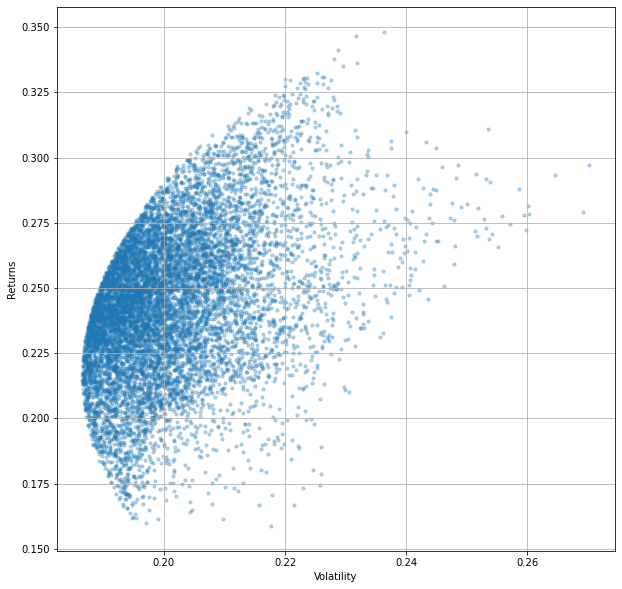

In [16]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

Minimum volatility (left most point)
Maximum returns (top most point)
And everything in between.

In [17]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.217010
Volatility      0.186509
AAPL weight     0.262666
NKE weight      0.406336
GOOGL weight    0.297643
AMZN weight     0.033355
Name: 9796, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

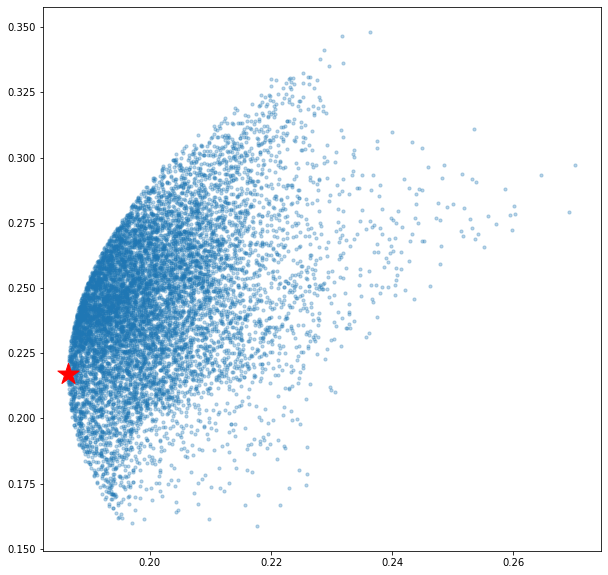

In [18]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

In [19]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.330288
Volatility      0.219921
AAPL weight     0.722950
NKE weight      0.093168
GOOGL weight    0.003150
AMZN weight     0.180733
Name: 2230, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

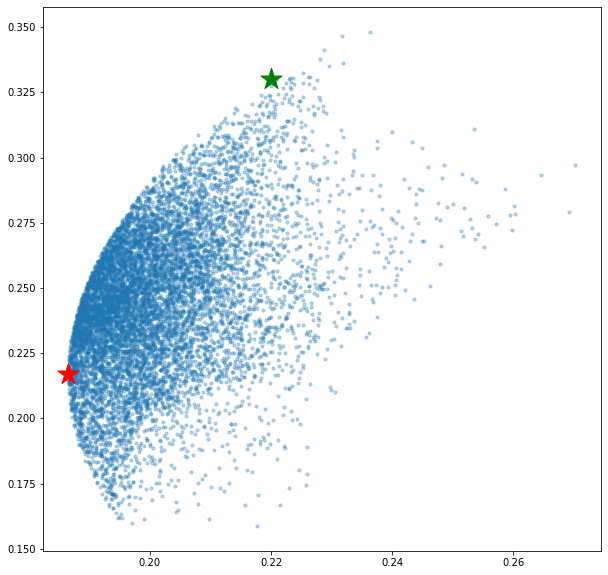

In [20]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

